In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import font_manager as fm
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
base_dir = Path(os.getenv("BASE_DIRECTORY"))
font_path = base_dir / "NotoSerifGujarati-Black.ttf"
guj_fonts = fm.FontProperties(fname=font_path)

In [8]:
file_path = base_dir / "data/commodities/commodities_price_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Display the first few rows to confirm the structure
print("Dataset preview:")
print(data.head())

Dataset preview:
                Item Name  Low Price  Average Price  High Price
Date                                                           
2024-10-22   કપાસ બી. ટી.       1101           1551        1626
2024-10-22      ઘઉં લોકવન        471            560         668
2024-10-22      ઘઉં ટુકડા        530            618         700
2024-10-22     મગફળી જીણી        811           1086        1221
2024-10-22  સિંગદાણા જાડા        900           1201        1291


C:\Users\ladan\AppData\Local\Temp\ipykernel_4684\2943160867.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


In [9]:
commodities = data['Item Name'].unique()
print(commodities)
print(commodities.shape)

['કપાસ બી. ટી.' 'ઘઉં લોકવન' 'ઘઉં ટુકડા' 'મગફળી જીણી' 'સિંગદાણા જાડા'
 'સિંગ ફાડીયા' 'એરંડા / એરંડી' 'જીરૂ' 'વરીયાળી' 'ધાણા' 'લસણ સુકું'
 'ડુંગળી લાલ' 'અડદ' 'તુવેર' 'રાય' 'મેથી' 'કાંગ' 'સુરજમુખી' 'મગફળી જાડી'
 'સફેદ ચણા' 'મગફળી નવી' 'તલ - તલી' 'ધાણી' 'બાજરો' 'જુવાર' 'મકાઇ' 'મગ'
 'ચણા' 'વાલ' 'વાલ પાપડી' 'ચોળા / ચોળી' 'સોયાબીન' 'ગોગળી' 'વટાણા' 'તલ કાળા'
 'ગુવાર બી' 'ઇસબગુલ' 'અજમાં' 'ક્લંજી' 'મગફળી 66' 'રાયડો' 'સુવાદાણા' 'કળથી'
 'મરચા સૂકા પટ્ટો' 'મઠ' 'મરચા' 'કારીજીરી' 'ડુંગળી સફેદ' 'રાજગરો' 'અરીઠા'
 'તલ લાલ' 'નવા ધાણા' 'રજકાનું બી' 'નવી ધાણી' 'નવું લસણ' 'નવું જીરૂ'
 'નવા ચણા' 'ઘઉં નવા']
(58,)


In [20]:
commodities = ['મરચા']
print(commodities)

['મરચા']


In [ ]:
import os

save_dir = base_dir / "ml_models/commodities_saved_models"
os.makedirs(save_dir, exist_ok=True)

In [22]:
# Step 1: Stationarity Check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary (no further differencing needed).")
        return True
    else:
        print("The series is not stationary (differencing is required).")
        return False


In [23]:
# Function to count significant lags
def count_significant_spikes(values, confint):
    # The significant lags are those outside the confidence interval
    significant_lags = np.where(np.abs(values) > confint[:, 1])[0]
    return len(significant_lags), significant_lags

In [24]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import os
import joblib
import hashlib

# Function to generate a safe file name
def safe_filename(product_name):
    return hashlib.md5(product_name.encode('utf-8')).hexdigest()

# To create models of All Products

In [ ]:
models = {}

for product in commodities:
    
    commodity_name = product 
    commodity_data = data[data['Item Name'] == commodity_name]
    size_commodity_data = commodity_data.shape[0]
    print(commodity_name, "size: ", size_commodity_data)
    
    if((size_commodity_data//2)-1 <= 0):
        continue
    
    # Check if any data exists for the selected commodity
    if commodity_data.empty:
        print(f"No data found for the commodity: {commodity_name}")

    else:
        # Extract the 'Average Price' column for the selected commodity
        price_data = commodity_data['Average Price']
        # price_data.index = pd.to_datetime(price_data.index, format='%d-%m-%Y')
        # Get the last date in the dataset
        # latest_date = price_data.index.max()
        #print(latest_date)

        # Calculate the start date for the last 3 months
        # three_months_ago = latest_date - pd.DateOffset(months=3)
        #print(three_months_ago)

        # Filter the data for plotting
        # filtered_data = price_data[price_data.index >= three_months_ago]
        #print(filtered_data)


        # Plot the raw price data for the selected commodity
        # plt.figure(figsize=(12, 6))
        # plt.plot(price_data.index, price_data, label=f'{commodity_name} Prices', marker='o', linestyle='-')
        # plt.title(f'Price Trend for {commodity_name}')
        # plt.xlabel('Date')
        # plt.ylabel('Average Price')
        # plt.xticks(rotation=90)
        # plt.legend()
        # plt.grid()
        # plt.tight_layout()
        # plt.show()
        

    # Step 2: Differencing (if necessary)
    print(f"Checking stationarity for the raw price data of {commodity_name}:")
    d = 0
    price_diff = price_data
    while True:
        if check_stationarity(price_diff):
            # price_diff = price_data
            print(f"Data is stationary with d={d}.")
            break
        else:
            price_diff = price_diff.diff().dropna()
            d += 1
    # if check_stationarity(price_data):
    #   price_diff = price_data
    # else:
    #   price_diff = price_data.diff().dropna()  # Apply differencing to make the series stationary

    print("\nChecking stationarity for the differenced data:")
    check_stationarity(price_diff)
    # print(d)

    # filtered_price_diff = price_diff[price_diff.index >= three_months_ago]  # For differenced data

    # Plot the differenced data
    # plt.figure(figsize=(12, 6))
    # plt.plot(price_diff, label='Differenced Data', marker='o', linestyle='-')
    # plt.title('Differenced Data')
    # plt.xlabel('Date')
    # plt.ylabel('Price Difference')
    # plt.xticks(rotation=90)
    # plt.legend()
    # plt.grid()
    # plt.show()
    
    
    # Step 3: Plot ACF and PACF

    acf_values, acf_confint = acf(price_diff, alpha=0.05)
    pacf_values, pacf_confint = pacf(price_diff, alpha=0.05)


    # Count significant spikes for ACF (q)
    q, significant_acf_lags = count_significant_spikes(acf_values, acf_confint)

    # Count significant spikes for PACF (p)
    p, significant_pacf_lags = count_significant_spikes(pacf_values, pacf_confint)

    print(f"Significant spikes in ACF (q): {q} at lags {significant_acf_lags}")
    print(f"Significant spikes in PACF (p): {p} at lags {significant_pacf_lags}")

    # ACF and PACF Plots
    try:
        plt.figure(figsize=(12, 6))
        plot_acf(price_diff, lags=(size_commodity_data//2)-1, title="Autocorrelation Function (ACF)")
        plt.show()

        plt.figure(figsize=(12, 6))
        plot_pacf(price_diff, lags=(size_commodity_data//2)-1, title="Partial Autocorrelation Function (PACF)")
        plt.show()
    
    except Exception as e:
        print(f"Can't plot the acf/pacf plots for {commodity_name} due to {e}")

    # Explanation:
    # - ACF (Autocorrelation Function): Measures the correlation between a series and its lagged values.
    # - PACF (Partial Autocorrelation Function): Measures the correlation between a series and its lagged values,
    #   removing the influence of intermediate lags.
    # - Use these plots to decide on p (AR term) and q (MA term).
    
    if p > 15:
        p = min(5, q)
    if q > 15: 
        q = min(5, p)
    if d > 5:
        d = 1

    # Choose p, d, q based on ACF and PACF (example values)
    # p, d, q = 5, 0, 2  # Adjust based on ACF/PACF analysis
    print(f"\nFitting ARIMA model for {commodity_name} with order ({p}, {d}, {q})...")
    model = ARIMA(price_data, order=(p,d,q))
    model_fit = model.fit()
    
    
    # Step 5: Analyze Model Summary
    print("\nARIMA Model Summary:")
    print(model_fit.summary())
    
    
    try:
        # Assume model_fit is the fitted ARIMA model for this product
        hashed_name = safe_filename(product)
        model_filename = os.path.join(save_dir, f"arima_model_{hashed_name}.pkl")
        joblib.dump(model_fit, model_filename)
        print(f"Model for {product} saved as {model_filename}")
    except Exception as e:
        print(f"Error saving model for {product}: {e}")


In [27]:
print(safe_filename('મગફળી 66'))

aba3d067395c6cad9ed5992a9e8dc05d


In [28]:
print(safe_filename("કપાસ બી. ટી."))

bc5d04b4f2d950f2417a01a7667c612f


58


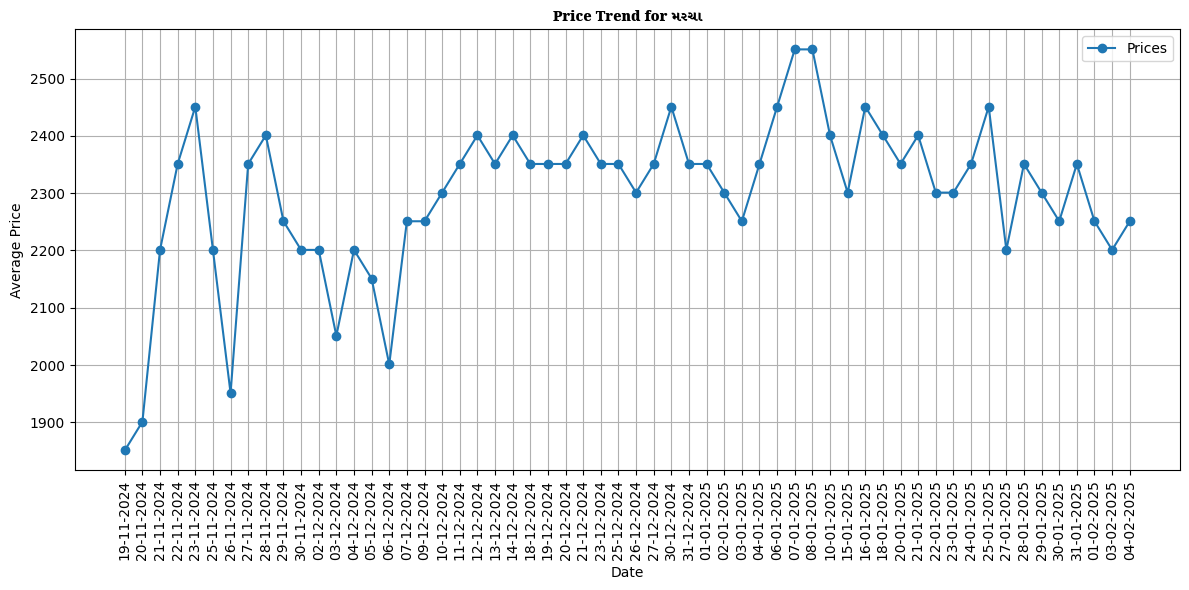

Model for મરચા loaded successfully.
                               SARIMAX Results                                
Dep. Variable:          Average Price   No. Observations:                   58
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -354.957
Date:                Fri, 07 Feb 2025   AIC                            719.915
Time:                        10:17:28   BIC                            730.217
Sample:                             0   HQIC                           723.927
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2281.4350     46.447     49.119      0.000    2190.400    2372.470
ar.L1          0.6989      0.122      5.734      0.000       0.460       0.938
ar.L2         -0

c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


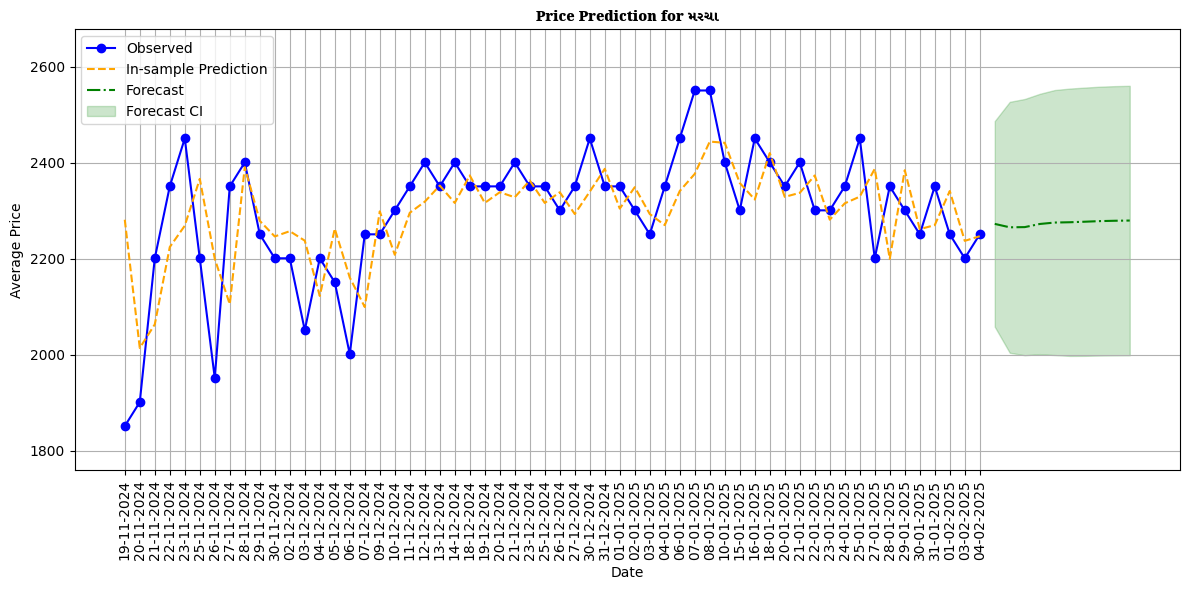

In [30]:
# Retrieve the model
product_name = "મરચા"  # Example product to evaluate
product_data = data[data["Item Name"] == product_name]
print(product_data.shape[0])
hashed_name = safe_filename(product_name)
model_filename = os.path.join(save_dir, f"arima_model_{hashed_name}.pkl")

# Check if any data exists for the selected commodity
if product_data.empty:
  print(f"No data found for the commodity: {product_name}")

else:
  # Extract the 'Average Price' column for the selected commodity
  price_data = product_data['Average Price']

  # Plot the raw price data for the selected commodity
  plt.figure(figsize=(12, 6))
  plt.plot(price_data.index, price_data, label=f'Prices', marker='o', linestyle='-')
  plt.title(f'Price Trend for {product_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

if os.path.exists(model_filename):
  
  print(f"Model for {product_name} loaded successfully.")
  loaded_model = joblib.load(model_filename)
  print(loaded_model.summary())
    
  # Step 6: In-sample Predictions
  pred = loaded_model.get_prediction(start=0, end=len(price_data)-1)
  pred_mean = pred.predicted_mean
  pred_ci = pred.conf_int()
    
  # Step 7: Forecast Future Prices
  forecast_steps = 10
  forecast = loaded_model.get_forecast(steps=forecast_steps)
  forecast_mean = forecast.predicted_mean
  forecast_ci = forecast.conf_int()
    
  # Step 8: Plot the Results with Detailed Y-Axis (Zoomed-In)
  plt.figure(figsize=(12, 6))

  # # Plot observed prices
  plt.plot(price_data.index, price_data, label='Observed', marker='o', linestyle='-', color='blue')

  # # Plot in-sample predictions
  plt.plot(pred_mean.index, pred_mean, label='In-sample Prediction', color='orange', linestyle='--')

  # # Plot forecasted prices
  plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green', linestyle='-.')

  # # Add confidence intervals for forecasts
  plt.fill_between(forecast_ci.index,
                  forecast_ci.iloc[:, 0],
                  forecast_ci.iloc[:, 1], color='green', alpha=0.2, label='Forecast CI')

  # # Adjust the y-axis range based on observed and forecasted prices
  plt.ylim(price_data.min() * 0.95, price_data.max() * 1.05)

  # # Graph labels and legend
  plt.title(f'Price Prediction for {product_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()
else:
  print(f"Model for {product_name} not found.")


In [89]:
from datetime import datetime, timedelta
import pandas as pd

# Current date (with time)
current_date = datetime.today()
print("Current Date:", current_date)

# Calculate the cutoff date (4 months ago)
cutoff_date = current_date - timedelta(days=4*30)
# Strip the time part for cutoff_date (set time to midnight)
cutoff_date = cutoff_date.replace(hour=0, minute=0, second=0, microsecond=0)
print("Cutoff Date:", cutoff_date)

# Example data: Assuming 'data' is your DataFrame and "Date" is the column with dates
# data = pd.DataFrame({
#     "Date": ["11-10-2024", "01-08-2024", "15-09-2024", "01-01-2024"]
# })

# Convert 'Date' column to datetime format with dayfirst=True
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
# Strip the time part for the 'Date' column (set time to midnight)
# data["Date"] = data["Date"].dt.replace(hour=0, minute=0, second=0, microsecond=0)

# Compare dates (now both are datetime objects with time set to midnight)
print(data["Date"] >= cutoff_date)


Current Date: 2025-02-08 15:35:25.771930
Cutoff Date: 2024-10-11 00:00:00
0       True
1       True
2       True
3       True
4       True
        ... 
2953    True
2954    True
2955    True
2956    True
2957    True
Name: Date, Length: 2958, dtype: bool


In [ ]:
import os
from pathlib import Path


base_dir = Path("D:/APMC-price-predictor")
file_path = base_dir / "data/commodities/commodities_price_data.csv"
# csv_file = "commodities_price_data.csv"  # Update with your file path
save_dir = base_dir / "ml_models/commodities_saved_models"
os.makedirs(save_dir, exist_ok=True)
data = pd.read_csv(file_path, encoding='utf-8', parse_dates=['Date'], date_format='%d/%m/%Y')
print(data.head())
products = data['Item Name'].unique()
print(products)

         Date      Item Name  Low Price  Average Price  High Price
0  16-10-2024   કપાસ બી. ટી.       1201           1586        1616
1  16-10-2024      ઘઉં લોકવન        552            580         604
2  16-10-2024      ઘઉં ટુકડા        540            570         670
3  16-10-2024     મગફળી જીણી        831           1131        1261
4  16-10-2024  સિંગદાણા જાડા       1050           1271        1321
['કપાસ બી. ટી.' 'ઘઉં લોકવન' 'ઘઉં ટુકડા' 'મગફળી જીણી' 'સિંગદાણા જાડા'
 'સિંગ ફાડીયા' 'એરંડા / એરંડી' 'જીરૂ' 'વરીયાળી' 'ધાણા' 'લસણ સુકું'
 'ડુંગળી લાલ' 'અડદ' 'તુવેર' 'રાજગરો' 'રાય' 'મેથી' 'કાંગ' 'મગફળી જાડી'
 'સફેદ ચણા' 'મગફળી 66' 'તલ - તલી' 'ધાણી' 'બાજરો' 'જુવાર' 'મકાઇ' 'મગ' 'ચણા'
 'વાલ' 'વાલ પાપડી' 'ચોળા / ચોળી' 'સોયાબીન' 'ગોગળી' 'ક્લંજી' 'મઠ'
 'સુવાદાણા' 'ગુવાર બી' 'વટાણા' 'તલ કાળા' 'રાયડો' 'મગફળી નવી' 'અજમાં'
 'સુરજમુખી' 'ઇસબગુલ' 'કળથી' 'મરચા સૂકા પટ્ટો' 'મરચા' 'કારીજીરી'
 'ડુંગળી સફેદ' 'અરીઠા' 'તલ લાલ' 'નવા ધાણા' 'રજકાનું બી' 'નવી ધાણી'
 'નવું લસણ' 'નવું જીરૂ']


In [6]:
import csv
import os
from pathlib import Path
from datetime import datetime

# Get today's date in dd/mm/yyyy format
today_date = datetime.now().strftime("%d/%m/%Y")
print(today_date)


def update_product_parameters(csv_file, today_date, product_name, p, d, q):
    # Read the existing CSV into a list of rows
    rows = []
    header = []
    
    # Open the CSV to read its current data
    if os.path.exists(csv_file):
        with open(csv_file, mode='r', newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            # Read the header and the rest of the rows
            header = next(reader)  # The first row is the header
            rows = list(reader)  # The rest of the rows are the data
    else:
        # If the file doesn't exist, we initialize an empty list for rows
        rows = []
    
    # Flag to check if the product is found
    product_found = False
    
    # Iterate through the rows and update the (p, d, q) values if the product is found
    for i, row in enumerate(rows):
        if row[1] == product_name:  # Assuming the 'Item Name' is in the second column (index 1)
            rows[i] = [today_date, product_name, p, d, q]  # Update the row with new values
            product_found = True
            print(f"Updated {product_name} with new (p, d, q): ({p}, {d}, {q})")
            break
    
    # If the product was not found, append it as a new entry
    if not product_found:
        rows.append([today_date, product_name, p, d, q])  # Add a new row for the product
        print(f"Added new item {product_name} with (p, d, q): ({p}, {d}, {q})")
    
    # Write the updated data back to the CSV
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header first
        writer.writerow(header)
        # Write all the rows (updated or new)
        writer.writerows(rows)

        
base_dir = Path(os.getenv("BASE_DIRECTORY"))
filename = base_dir / "ml_models/commodities_saved_models/commodities_parameters.csv"

update_product_parameters(filename, today_date, "કપાસ બી. ટી.", 4, 1, 5)


27/02/2025
Updated કપાસ બી. ટી. with new (p, d, q): (4, 1, 5)


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pathlib import Path
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from dateutil import rrule
from datetime import date
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox, skew
from matplotlib import font_manager as fm
import os
import joblib
import hashlib
import csv
from dotenv import load_dotenv
load_dotenv()

products_with_boxcox = []


### removes data older than 4 months-----------------------------------------------------------------------------------------------
base_dir = Path(os.getenv("BASE_DIRECTORY"))
file_path = base_dir / "data/commodities/commodities_price_data.csv"
# csv_file = "commodities_price_data.csv"  # Update with your file path
save_dir = base_dir / "ml_models/commodities_saved_models"
filename = base_dir / "ml_models/commodities_saved_models/commodities_parameters.csv"
os.makedirs(save_dir, exist_ok=True)
data = pd.read_csv(file_path, encoding='utf-8', parse_dates=['Date'], date_format='%d/%m/%Y')
print(data.head())
products = data['Item Name'].unique()
print(products)

# Get current date and calculate the cutoff date (4 months ago)
current_date = datetime.today()
cutoff_date = current_date - timedelta(days=4*30) # Approximate 4 months
cutoff_date = cutoff_date.replace(hour=0, minute=0, second=0, microsecond=0)

today_date = datetime.now().strftime("%d/%m/%Y")

# Filter data to keep only the last 4 months
filtered_data = data[pd.to_datetime(data["Date"], dayfirst=True) >= cutoff_date]

# Save the cleaned data back to CSV
filtered_data.to_csv(file_path, encoding='utf-8', index=False)

print(f"Data older than {cutoff_date.strftime('%d-%m-%Y')} has been removed.")

logs = []
###------------------------------------------------------------------------------------------------------------------------------

#function to get product parameters from csv
def get_product_parameters(filename, product_name):
    result = []
    
    # Open the CSV file
    with open(filename, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)  # Using DictReader to work with column headers
        for row in reader:
            if product_name in row['Item Name']:  # Check if product_name matches
                result.append({
                    'Date': row['Date'],
                    'Item Name': row['Item Name'],
                    'p': row['p'],
                    'd': row['d'],
                    'q': row['q']
                })
    
    return result


#function to update arima model parameters
def update_product_parameters(csv_file, today_date, product_name, p, d, q):
    # Read the existing CSV into a list of rows
    rows = []
    header = []
    
    # Open the CSV to read its current data
    if os.path.exists(csv_file):
        with open(csv_file, mode='r', newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            # Read the header and the rest of the rows
            header = next(reader)  # The first row is the header
            rows = list(reader)  # The rest of the rows are the data
    else:
        # If the file doesn't exist, we initialize an empty list for rows
        rows = []
    
    # Flag to check if the product is found
    product_found = False
    
    # Iterate through the rows and update the (p, d, q) values if the product is found
    for i, row in enumerate(rows):
        if row[1] == product_name:  # Assuming the 'Item Name' is in the second column (index 1)
            rows[i] = [today_date, product_name, p, d, q]  # Update the row with new values
            product_found = True
            message = f"Updated {product_name} with new (p, d, q): ({p}, {d}, {q})"
            print(message)
            logs.append(message)
            break
    
    # If the product was not found, append it as a new entry
    if not product_found:
        rows.append([today_date, product_name, p, d, q])  # Add a new row for the product
        message = f"Added new item {product_name} with (p, d, q): ({p}, {d}, {q})"
        print(message)
        logs.append(message)
    
    # Write the updated data back to the CSV
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header first
        writer.writerow(header)
        # Write all the rows (updated or new)
        writer.writerows(rows)



###Saving updated ARIMA models---------------------------------------------------------------------------------------------------

# Step 1: Stationarity Check
def check_stationarity(series, size):
    if len(series) == size:
        return True
    result = adfuller(series)
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary (no further differencing needed).")
        return True
    else:
        print("The series is not stationary (differencing is required).")
        return False

# Function to count significant lags
def count_significant_spikes(values, confint):
    # The significant lags are those outside the confidence interval
    significant_lags = np.where(np.abs(values) > confint[:, 1])[0]
    return len(significant_lags), significant_lags

# Function to generate a safe file name
def safe_filename(product_name):
    return hashlib.md5(product_name.encode('utf-8')).hexdigest()





###updating the csv with current data---------------------------------------------------------------------------------------------

def write_to_csv(data, filename):
    # Define the field names for the CSV file
    # fieldnames = ['Serial Number', 'Date', 'Item Name', 'Low Price', 'Average Price', 'High Price']
    
    # Write data to CSV file
    with open(filename, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write header row
        # writer.writerow(fieldnames)
        
        # Write data rows
        for _, row_data in enumerate(data):
            date = row_data[0]
            item_name = row_data[2]
            low_price = row_data[3]
            avg_price = row_data[5]
            high_price = row_data[4]
            writer.writerow([date, item_name, low_price, avg_price, high_price])
            
            
def getData(driver, csv_file_name, webpage_path, date_path, submit_button_path, table_path):
    
    # add_field_names_price(csv_file_name)
    
    #iterate over all the dates    
    try:
        # Open the webpage
        driver.get(webpage_path)
            
        # Find the date input element
        date_input = driver.find_element(By.XPATH, date_path)

        # Clear any existing text in the date input field
        date_input.clear()
          
        # Enter the desired date
        date_input.send_keys(current_date.strftime('%d-%m-%Y'))  # Example date, replace with your desired date

        # Find and click the button to get data for the specified date
        submit_button = driver.find_element(By.XPATH, submit_button_path)
        submit_button.click()
         
        time.sleep(3) #to load data

        #Extract the table data
        table = driver.find_element(By.XPATH, table_path)
        # print(table)
        data = []

        # Iterate over each row in the table
        for row in table.find_elements(By.TAG_NAME, "tr"):
            # Find all cells (td) in the row
            cells = row.find_elements(By.TAG_NAME, "td")
                
            # Ensure that there are cells in the row
            if cells:
                # Extract text from each cell and append to the data list
                row_data = [current_date.strftime('%d-%m-%Y')] + [cell.text.strip() for cell in cells]
                data.append(row_data)

        # Print the extracted data for debugging
        # for row in data:
        #     print(row)
        write_to_csv(data, csv_file_name)
        time.sleep(2)
        # return data
            
    except Exception as e:
        print(e)
        pass


def main():
    # Initialize Chrome WebDriver
    driver = webdriver.Chrome()

    # commodities_data_table = 
    getData(driver, file_path, os.getenv("COMMODITIES_WEBPAGE_PATH"), 
                                             os.getenv("COMMODITIES_DATE_PATH"),
                                             os.getenv("COMMODITIES_SUBMIT_BUTTON_PATH"),
                                             os.getenv("COMMODITIES_TABLE_PATH"))
    
    time.sleep(5)
    
    # Close the WebDriver
    driver.quit()
    
    
    
    ###Updating models------------------------------------------------------------------------------------------------------------
    
    for product in products:
    
        product_name = product 
        product_data = data[data['Item Name'] == product_name]
        size_product_data = product_data.shape[0]
        print(product_name, "size: ", size_product_data)
        
        if((size_product_data//2)-1 <= 0):
            continue
        
        # Check if any data exists for the selected product
        if product_data.empty:
            print(f"No data found for the product: {product_name}")

        else:
            # Extract the 'Average Price' column for the selected product
            price_data = product_data['Average Price']
            # price_data.index = pd.to_datetime(price_data.index, format='%d-%m-%Y')
            # Get the last date in the dataset
            # latest_date = price_data.index.max()
            #print(latest_date)

            # Calculate the start date for the last 3 months
            # three_months_ago = latest_date - pd.DateOffset(months=3)
            #print(three_months_ago)

            # Filter the data for plotting
            # filtered_data = price_data[price_data.index >= three_months_ago]
            #print(filtered_data)


            # Plot the raw price data for the selected commodity
            # plt.figure(figsize=(12, 6))
            # plt.plot(price_data.index, price_data, label=f'{commodity_name} Prices', marker='o', linestyle='-')
            # plt.title(f'Price Trend for {commodity_name}')
            # plt.xlabel('Date')
            # plt.ylabel('Average Price')
            # plt.xticks(rotation=90)
            # plt.legend()
            # plt.grid()
            # plt.tight_layout()
            # plt.show()
            
        variance_ratio = price_data.std() / price_data.mean()
        skewness = skew(price_data)

        if variance_ratio > 0.1 and skewness > 0.5:
            apply_boxcox = True
            products_with_boxcox.append(product_name)
        else:
            apply_boxcox = False
        
        
        if product_name == 'મેથી':
            apply_boxcox = True
        print(apply_boxcox)
        # Step 2: Differencing (if necessary)
        print(f"Checking stationarity for the raw price data of {product_name}:")
        d = 0
        price_diff = price_data
        
        try:
            if apply_boxcox:
                price_diff, lam = boxcox(price_diff)
                price_diff = pd.Series(price_diff)
        
            while True:
                if check_stationarity(price_diff, (size_product_data//2)+1):
                    # price_diff = price_data
                    print(f"Data is stationary with d={d}.")
                    break
                else:
                    price_diff = price_diff.diff().dropna()
                    d += 1
        
        # if check_stationarity(price_data):
        #   price_diff = price_data
        # else:
        #   price_diff = price_data.diff().dropna()  # Apply differencing to make the series stationary

            print("\nChecking stationarity for the differenced data:")
            check_stationarity(price_diff, (size_product_data//2)+1)
        
        except Exception as e:
            print(f"Stationarity cannot be applicable for {product_name}")
        # print(d)

        # filtered_price_diff = price_diff[price_diff.index >= three_months_ago]  # For differenced data

        # Plot the differenced data
        # plt.figure(figsize=(12, 6))
        # plt.plot(price_diff, label='Differenced Data', marker='o', linestyle='-')
        # plt.title('Differenced Data')
        # plt.xlabel('Date')
        # plt.ylabel('Price Difference')
        # plt.xticks(rotation=90)
        # plt.legend()
        # plt.grid()
        # plt.show()
        
        
        # Step 3: Plot ACF and PACF

        acf_values, acf_confint = acf(price_diff, alpha=0.05)
        pacf_values, pacf_confint = pacf(price_diff, alpha=0.05)


        # Count significant spikes for ACF (q)
        q, significant_acf_lags = count_significant_spikes(acf_values, acf_confint)

        # Count significant spikes for PACF (p)
        p, significant_pacf_lags = count_significant_spikes(pacf_values, pacf_confint)

        print(f"Significant spikes in ACF (q): {q} at lags {significant_acf_lags}")
        print(f"Significant spikes in PACF (p): {p} at lags {significant_pacf_lags}")

        # ACF and PACF Plots
        try:
            plt.figure(figsize=(12, 6))
            plot_acf(price_diff, lags=(size_product_data//2)-1, title="Autocorrelation Function (ACF)")
            plt.show()

            plt.figure(figsize=(12, 6))
            plot_pacf(price_diff, lags=(size_product_data//2)-1, title="Partial Autocorrelation Function (PACF)")
            plt.show()
        
        except Exception as e:
            print(f"Can't plot the acf/pacf plots for {product_name} due to {e}")

        # Explanation:
        # - ACF (Autocorrelation Function): Measures the correlation between a series and its lagged values.
        # - PACF (Partial Autocorrelation Function): Measures the correlation between a series and its lagged values,
        #   removing the influence of intermediate lags.
        # - Use these plots to decide on p (AR term) and q (MA term).
        
        if p > 5:
            p = min(5, q)
        if q > 5: 
            q = min(5, p)
        if d > 3:
            d = 1

        fit_successful = False

        while not fit_successful and q >= 0:
            try:
                print(f"\nFitting ARIMA model with order ({p}, {d}, {q})...")
                model = ARIMA(price_data, order=(p, d, q))
                model_fit = model.fit()
                fit_successful = True  
                print("ARIMA model fitted successfully!")
                
            except np.linalg.LinAlgError as err:
                print(f"Error encountered: {err}")
                if q > 0: 
                    q -= 1
                    print(f"Reducing q to {q} and trying again...")
                else:
                    print("Unable to fit model after reducing q multiple times. Exiting loop.")
                    break  
        
        
        # Step 5: Analyze Model Summary
        print("\nARIMA Model Summary:")
        print(model_fit.summary())
        
        
        # product_parameters = get_product_parameters(filename, product_name)
        
        # for item in product_parameters:
        #     p = item['p']
        #     d = item['d']
        #     q = item['q']
            
        update_product_parameters(filename, today_date, product_name, p, d, q)
        
        # with open(filename, mode='a', newline='', encoding='utf-8') as file:
        #     writer = csv.writer(file)
            
        #     # Write header row
        #     # writer.writerow(fieldnames)
        
        #     writer.writerow([today_date, product_name, p, d, q])
        
        
        # try:
        #     # Assume model_fit is the fitted ARIMA model for this product
        #     hashed_name = safe_filename(product)
        #     model_filename = os.path.join(save_dir, f"arima_model_{hashed_name}.pkl")
        #     joblib.dump(model_fit, model_filename)
        #     print(f"Model for {product} saved as {model_filename}")
        # except Exception as e:
        #     print(f"Error saving model for {product}: {e}")


if __name__ == "__main__":
    main()


In [2]:
for msg in logs:
    print(msg)

Updated કપાસ બી. ટી. with new (p, d, q): (5, 1, 5)
Updated ઘઉં લોકવન with new (p, d, q): (2, 1, 1)
Updated ઘઉં ટુકડા with new (p, d, q): (4, 1, 4)
Updated મગફળી જીણી with new (p, d, q): (3, 1, 3)
Updated જીરૂ with new (p, d, q): (1, 1, 1)
Updated ડુંગળી લાલ with new (p, d, q): (4, 1, 2)
Updated અડદ with new (p, d, q): (0, 0, 0)
Updated તુવેર with new (p, d, q): (4, 1, 4)
Updated રાય with new (p, d, q): (4, 0, 0)
Updated મેથી with new (p, d, q): (0, 0, 0)
Updated સુરજમુખી with new (p, d, q): (3, 0, 1)
Updated મગફળી જાડી with new (p, d, q): (2, 1, 2)
Updated બાજરો with new (p, d, q): (1, 0, 0)
Updated જુવાર with new (p, d, q): (5, 0, 4)
Updated મકાઇ with new (p, d, q): (5, 1, 5)
Updated વાલ with new (p, d, q): (4, 1, 4)
Updated ચોળા / ચોળી with new (p, d, q): (5, 1, 5)
Updated સિંગદાણા જાડા with new (p, d, q): (4, 2, 2)
Updated સિંગ ફાડીયા with new (p, d, q): (1, 0, 0)
Updated એરંડા / એરંડી with new (p, d, q): (2, 1, 2)
Updated તલ કાળા with new (p, d, q): (2, 0, 1)
Updated ક્લંજી with ne

In [4]:
from datetime import datetime

# Get today's date in dd/mm/yyyy format
today_date = datetime.now().strftime("%d/%m/%Y")
print(today_date)


27/02/2025


In [10]:
import csv
base_dir = Path(os.getenv("BASE_DIRECTORY"))
filename = base_dir / "ml_models/commodities_saved_models/commodities_parameters.csv"

In [11]:
def write_to_csv(filename):
    fieldnames = ['Date', 'Item Name', 'p', 'd', 'q']
    with open(filename, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write header row
        writer.writerow(fieldnames)
        
        # writer.writerow([today_date, product_name, p, d, q])

In [12]:
write_to_csv(filename)

# source .venv/Scripts/activate
to run in git bash

# Initialize migrations (run once)
flask db init

# After changing your models, generate migration script
flask db migrate -m "Add a new table for users"

# Apply the migration to the database
flask db upgrade
